#### Car_evaluation.csv
#### price(자동차가격)/maint(자동차 유지 비용)/doors(문의 개수)/persons(인원)
#### lug_capacity(수하물 용량)/safety(안전성)
#### output(차상태)-unacc,acc,good,very good

In [6]:
# libraty
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

import seaborn as sns       # 다양한 통계 지표 낼 수 있는 시각화 차트 제공
sns.set(style="darkgrid")


In [10]:
# data (파일 선택방법으로...)
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv('car_evaluation.csv', names=cols, header=None)

cars
#cars.shape

Saving car_evaluation.csv to car_evaluation (3).csv


,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


<Axes: ylabel='count'>

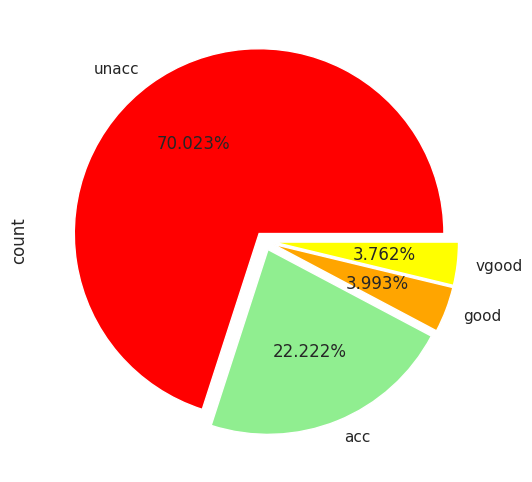

In [17]:
# output visualization
plot_size = plt.rcParams["figure.figsize"]          #
plot_size [0] = 8                                   #
plot_size [1] = 6                                   #
plt.rcParams["figure.figsize"] = plot_size          #
cars.output.value_counts().plot(kind='pie', autopct='%0.03f%%',
                                colors=['red', 'lightgreen', 'orange', 'yellow'],
                                explode=(0.05,        0.05,         0.05,     0.05))

### One-hot encoding

In [27]:
# catagory -> digit number  (One-hot encoding)
price        = pd.get_dummies(cars.price, prefix='price')
maint        = pd.get_dummies(cars.maint, prefix='maint')
doors        = pd.get_dummies(cars.doors, prefix='doors')
persons      = pd.get_dummies(cars.persons, prefix='persons')
lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety       = pd.get_dummies(cars.safety, prefix='safety')

labels       = pd.get_dummies(cars.output, prefix='condition')

#print(labels)

X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)  # 선택된 범위를 하나의 문자열로 결합 (axis=0:세로, axis=1:가로 결합)
y = labels.values

X
#y

,price_high,price_low,price_med,price_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_capacity_big,lug_capacity_med,lug_capacity_small,safety_high,safety_low,safety_med
0,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
1,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
2,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
3,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,False,True,False,False,False,True,False,False,False,False,...,True,False,False,True,False,True,False,False,False,True
1724,False,True,False,False,False,True,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
1725,False,True,False,False,False,True,False,False,False,False,...,True,False,False,True,True,False,False,False,True,False
1726,False,True,False,False,False,True,False,False,False,False,...,True,False,False,True,True,False,False,False,False,True


#### data split

In [29]:
# data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### make a Model  & number of parameter
#### 1) 330 = (21 * 15) + 15
#### 2) 150 = (15 * 10) + 10
#### 3)  44 = (10 *  4) +  4

In [30]:
# Model
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

input_layer   = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

output        = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 534 (2.09 KB)

 Trainable params: 534 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Training
istory = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.4908 - loss: 1.1354 - val_acc: 0.6498 - val_loss: 0.8750
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7257 - loss: 0.6450 - val_acc: 0.6931 - val_loss: 0.6711
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7735 - loss: 0.5148 - val_acc: 0.7509 - val_loss: 0.5363
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8219 - loss: 0.4031 - val_acc: 0.8375 - val_loss: 0.4478
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8788 - loss: 0.3142 - val_acc: 0.8231 - val_loss: 0.3953
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8842 - loss: 0.2819 - val_acc: 0.8412 - val_loss: 0.3604
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8946 - loss: 0.2454 - val_acc: 0.8484 - val_loss: 0.3257
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9118 - loss: 0.2062 - val_acc: 0.8664 - val_loss: 0.2990
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

#### 평가

In [32]:
# accuracy
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9810 - loss: 0.0451 
Test Score: 0.03645098954439163
Test Accuracy: 0.9855491518974304


#### 딥러닝 분류 모델의 성고 지표.

#### True Positive : 1 예측 / 1 실제
#### True Negative : 0 예측 / 0 실제
#### False Positive : 1 예측 / 0실제
#### False Negative : 0 예측 / 1실제

#### 정확도(Accuracy)  = TP + TN  / TP + TN + FP + FN
#### 재현율(recall)    = TP       / TP           + FN
#### 정밀도(Procision) = TP       / TP      + FP       
#### F1-Score  = 2 * ((Rrecision * Recall) / (Precision + Recall))